#**Algoritmos de Clasificación para Machine Learning**

La clasificación es una técnica de Machine Learning supervisado que se utiliza para predecir a qué categoría (o clase) pertenece un conjunto de datos. El modelo aprende a partir de datos etiquetados, donde las etiquetas indican la clase a la que pertenecen los ejemplos.

**Tipos de problemas de clasificación**

Clasificación Binaria:

Solo hay dos clases posibles.
Por ejemplo, determinar si un cliente pagará o no un préstamo (sí o no).

Clasificación Multiclase:

Hay más de dos clases, pero cada ejemplo pertenece a una sola clase. Por ejemplo, clasificar tipos de flores como setosa, versicolor o virginica.

**Diferencias entre clasificación y regresión**

| **Aspecto**           | **Clasificación**                          | **Regresión**                             |
|-----------------------|--------------------------------------------|-------------------------------------------|
| **Tipo de salida**    | Categorías o etiquetas discretas.         | Valores continuos (números reales).      |
| **Ejemplo de salida** | spam/no spam, tipo de flor.                | Precio de una casa, temperatura futura.  |
| **Métrica principal** | Precisión, Recall, F1-score, AUC-ROC.      | Error cuadrático medio (MSE), MAE, R².   |


**Ciclo de vida de un proyecto de clasificación**

**Preparación de datos:**

Recolección de datos relevantes.
Limpieza y preprocesamiento (manejo de valores nulos, outliers, etc.).
División en conjunto de entrenamiento y prueba.

**Selección de modelo:**

Identificar el algoritmo adecuado según los datos y el problema (Árboles de Decisión, SVM, etc.).
Ajustar hiperparámetros para optimizar el modelo.

**Evaluación y métricas:**

Dividir los datos en entrenamiento y validación (usando validación cruzada).

Evaluar el rendimiento con métricas como precisión, recall, F1-score y AUC-ROC.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Cargar dataset Iris y transformar a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
# Visualizamos los primeros datos
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Sepal Length (cm) (Longitud del sépalo en cm):** Es la longitud de la parte externa de la flor conocida como sépalo, que es la estructura que protege los pétalos antes de que la flor se abra.
Rango típico en el dataset: 4.3 a 7.9 cm.

**Sepal Width (cm) (Anchura del sépalo en cm):** Es la medida del ancho del sépalo.
Rango típico en el dataset: 2.0 a 4.4 cm.

**Petal Length (cm) (Longitud del pétalo en cm):** Es la longitud de los pétalos de la flor. Los pétalos son la parte colorida de la flor que rodea los órganos reproductivos.
Rango típico en el dataset: 1.0 a 6.9 cm.

**Petal Width (cm) (Anchura del pétalo en cm):** Es la medida del ancho de los pétalos de la flor.
Rango típico en el dataset: 0.1 a 2.5 cm.

**Target (Objetivo o clase):** Esta columna indica a qué especie de flor pertenece el conjunto de medidas de sépalos y pétalos. Los valores son categóricos:
0: **Iris Setosa**.
1: **Iris Versicolor**.
2: **Iris Virginica**.

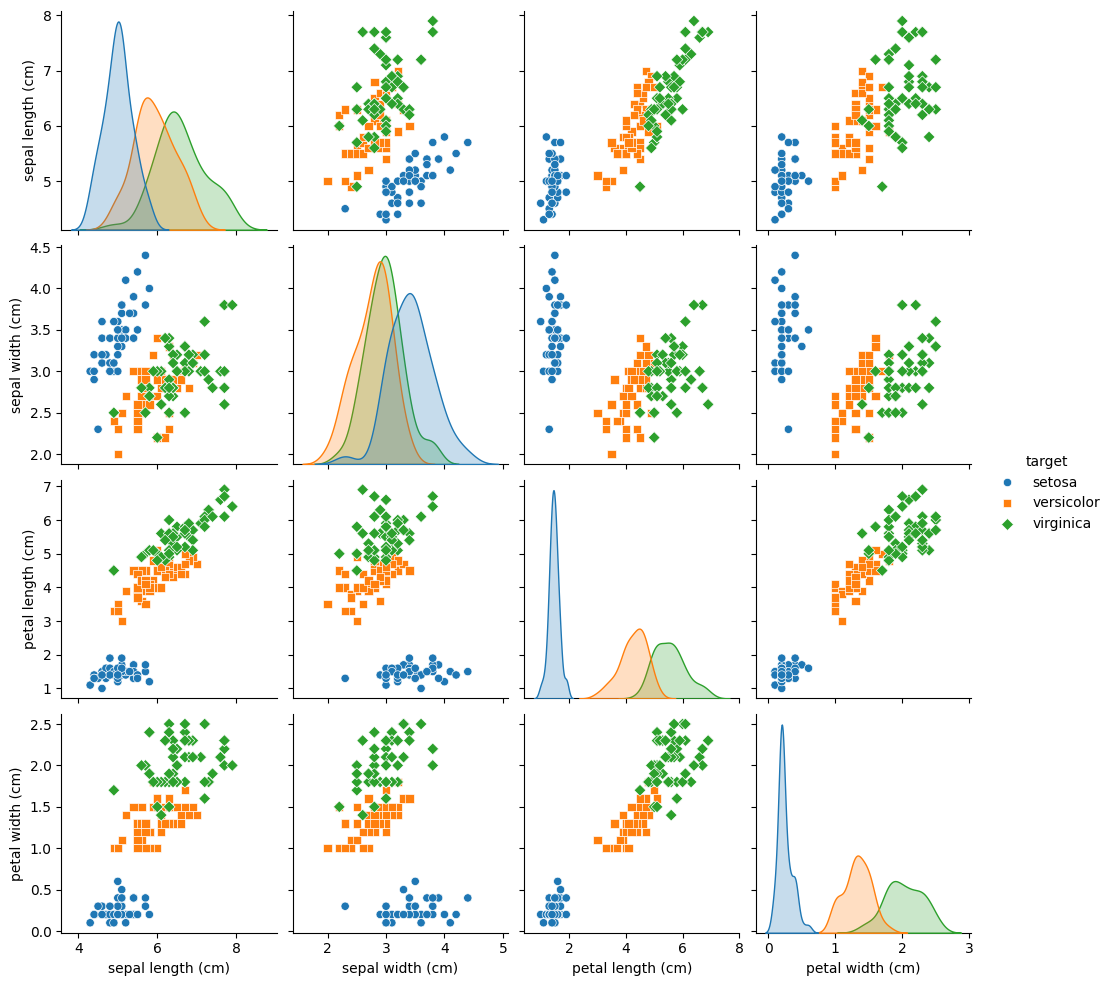

In [6]:
# Visualización usando pairplot para ver las relaciones entre características
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Separar características (X) y la clase objetivo (y)
X = iris.data
y = iris.target

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random state 42 es una semilla para remover la aleatoriedad.

In [12]:
# Entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Realizar predicciones
y_pred = clf.predict(X_test)

In [15]:
# Evaluación: Matriz de Confusión y Reporte de Clasificación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



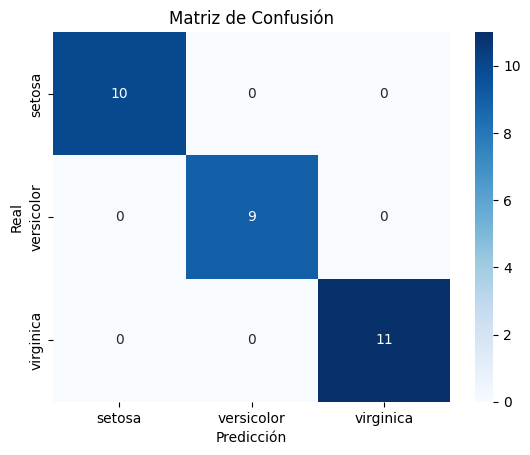

In [16]:
# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# **Árboles de decisión**

Un árbol de decisión es un modelo de predicción que utiliza una estructura jerárquica en forma de árbol para tomar decisiones. Se divide en nodos y ramas. Cada nodo representa una característica o variable, mientras que cada rama representa una decisión o resultado basado en esa característica.

**Raíz**: El nodo superior que representa la primera decisión.

**Nodos intermedios**: Decisiones basadas en las características seleccionadas.

**Hojas**: Los nodos terminales que representan la clasificación final o predicción.

El árbol sigue dividiendo los datos en subconjuntos, eligiendo las características que mejor separan las clases en cada paso, hasta que llega a una clasificación o predicción en cada hoja.

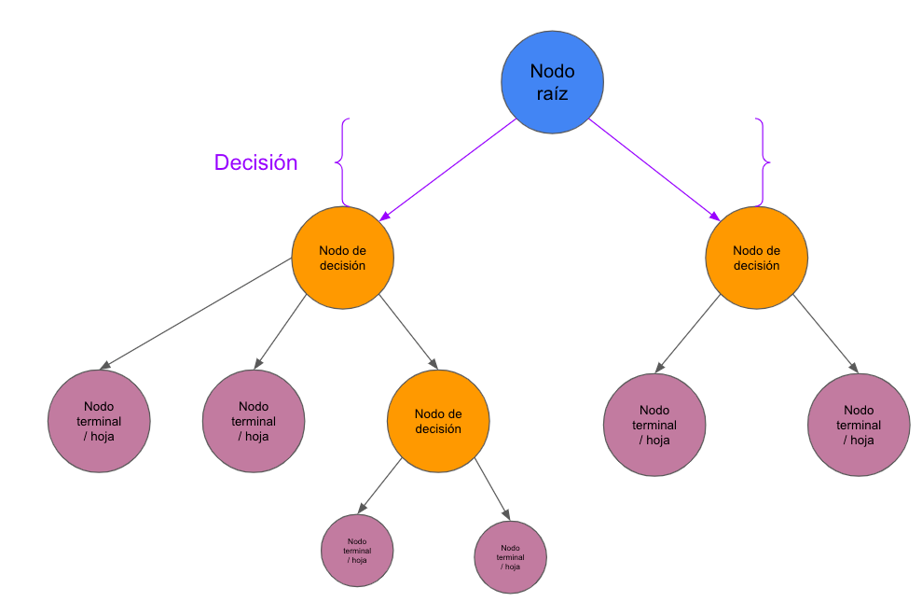

**Construcción del Árbol: Entropía, Gini y Cómo se Eligen los Mejores Splits**

La construcción de un árbol de decisión implica seleccionar los mejores splits (divisiones) en cada nodo para maximizar la separación de las clases. Dos de las medidas más comunes utilizadas para esto son:

**Entropía:**

La entropía mide la incertidumbre o desorden de los datos. Se usa en combinación con el ganancia de información para decidir los splits.

$$H(S)=−
i=1
∑
c
​
 p
i
​
 log
2
​
 (p
i
​
 )$$

## Usar cuando tenemos mucho caos mucha incertidumbre en los datos. mucha variabilidad

Donde
𝑝
𝑖 es la probabilidad de que un ejemplo pertenezca a la clase
𝑖
i, y
𝑐
c es el número total de clases.

La ganancia de información se calcula como la diferencia en la entropía antes y después de un split, buscando maximizar esta diferencia.

**Índice Gini:**

El índice Gini mide la impureza de un nodo. Es preferido en árboles como CART (Classification and Regression Trees).


$$Gini(S)=1−
i=1
∑
c
​
 p
i
2
​
$$

In [ ]:
## Mucho ruido en los datos. 

Un índice Gini bajo indica un nodo más puro, es decir, una mejor separación entre las clases.

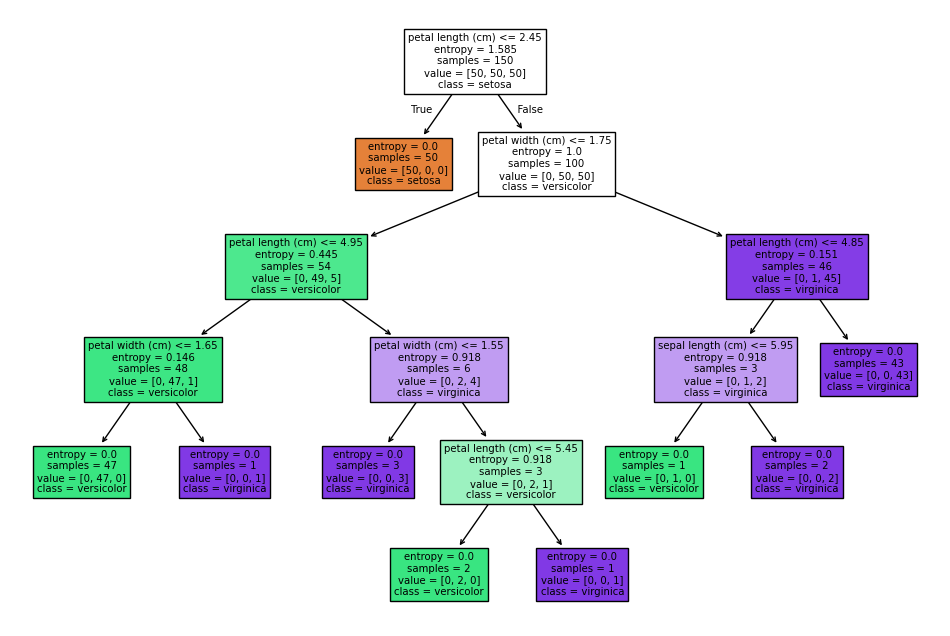

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear y entrenar el modelo
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X, y)

# Visualización del árbol
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

**Ventajas y Desventajas de los Árboles de Decisión**

**Ventajas:**
Fácil de interpretar: Los árboles de decisión se visualizan fácilmente, lo que los hace intuitivos.
No requiere normalización: No es necesario escalar los datos, ya que el modelo no depende de distancias.

**Manejo de datos categóricos:** Los árboles pueden manejar variables categóricas y numéricas sin requerir transformaciones.
Poderosos para datos no lineales: Capturan relaciones no lineales entre las características y la salida.

**Desventajas:**
Propenso al sobreajuste: Los árboles de decisión pueden ajustarse demasiado a los datos de entrenamiento si no se controla la profundidad del árbol o no se aplica poda.

**Inestabilidad:** Pequeñas variaciones en los datos pueden llevar a la construcción de un árbol completamente diferente.
Menor rendimiento comparado con métodos más complejos: En muchos casos, otros métodos como Random Forest o XGBoost pueden superar a los árboles de decisión individuales.

# **K-Nearest Neighbors (KNN)**

El algoritmo K-Nearest Neighbors (KNN) es un modelo de clasificación (o regresión) basado en la proximidad de los datos. En clasificación, KNN clasifica un punto de datos nuevo según la clase a la que pertenecen sus K vecinos más cercanos.

El funcionamiento básico de KNN es:

**Almacenamiento de datos:** Al contrario de otros algoritmos que construyen un modelo durante el entrenamiento, KNN simplemente almacena los datos de entrenamiento.

**Cálculo de la distancia:** Cuando llega un nuevo punto para clasificar, se calcula la distancia entre este punto y todos los puntos de entrenamiento. La distancia más común utilizada es la distancia euclidiana, aunque pueden usarse otras métricas.

**Selección de los K vecinos más cercanos:** Después de calcular la distancia, se seleccionan los K puntos más cercanos al nuevo punto.

**Asignación de la clase:** El nuevo punto se clasifica según la mayoría de clases en los K vecinos seleccionados.

**K Óptimo: Selección del Número de Vecinos K**

La elección del valor de K es crucial para el rendimiento de KNN. Un valor pequeño de K puede hacer que el modelo sea muy sensible al ruido en los datos, mientras que un valor demasiado grande puede hacer que el modelo pierda detalles importantes.

K pequeño: Alta varianza (overfitting). El modelo puede ajustarse demasiado a los datos de entrenamiento.

K grande: Alta sesgo (underfitting). El modelo puede perder precisión al no capturar correctamente los patrones.

Para encontrar el valor óptimo de K, se suele utilizar la validación cruzada, probando diferentes valores de K y seleccionando el que tenga mejor rendimiento.



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

In [20]:
# Preprocesar los datos (escalado de características)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [22]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Realizar predicciones
y_pred = knn.predict(X_test)

In [24]:
# Evaluar el modelo
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Exactitud del modelo: 1.0


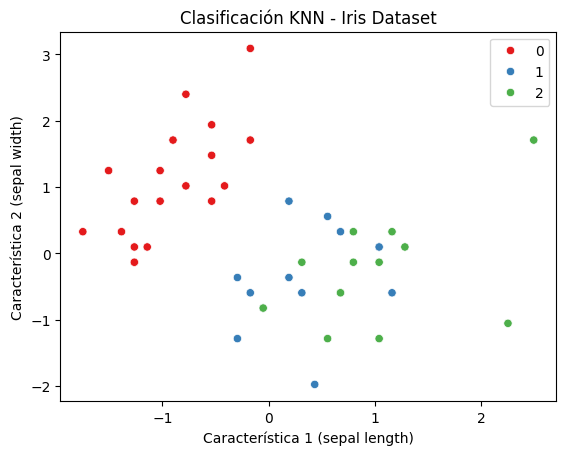

In [25]:
# Visualizar los resultados
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set1')
plt.title("Clasificación KNN - Iris Dataset")
plt.xlabel("Característica 1 (sepal length)")
plt.ylabel("Característica 2 (sepal width)")
plt.show()

**Ejemplo práctico con validación cruzada en KNN:**

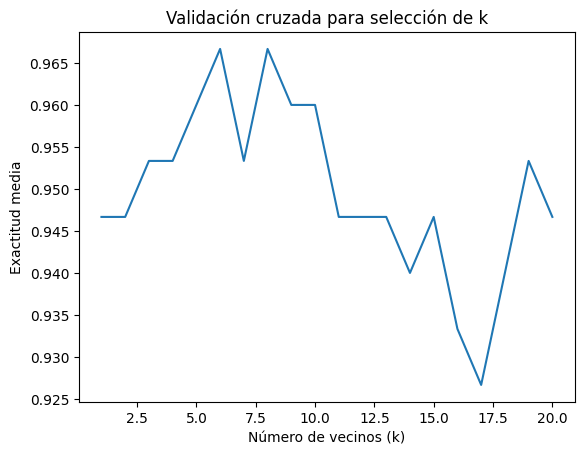

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Probar varios valores de k (por ejemplo, k=1 a k=20)
k_range = range(1, 21)
k_scores = []

# Evaluación con validación cruzada
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    k_scores.append(np.mean(scores))

# Visualizar el rendimiento de k en función de la exactitud
plt.plot(k_range, k_scores)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Exactitud media')
plt.title('Validación cruzada para selección de k')
plt.show()

#**Regresión Logística**

La regresión logística es un algoritmo de clasificación utilizado principalmente para resolver problemas de clasificación binaria, donde el objetivo es predecir una de dos posibles clases. A pesar de su nombre, es una técnica de clasificación, no de regresión, y utiliza una función de probabilidad para determinar la clase a la que pertenece una observación.

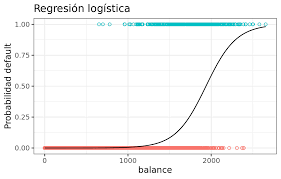

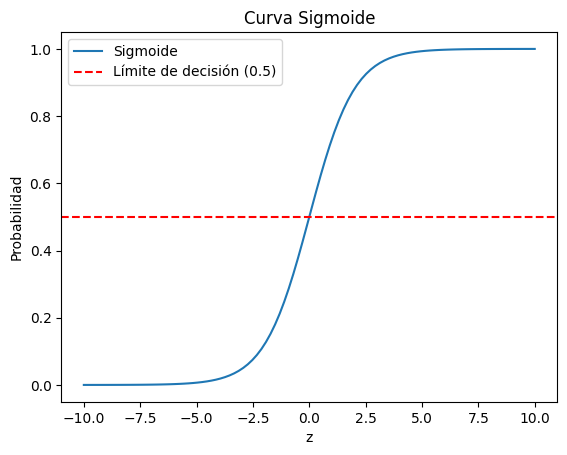

In [27]:
# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Crear un rango de valores para z
z = np.linspace(-10, 10, 100)

# Calcular la sigmoide para cada valor de z
sigma_z = sigmoid(z)

# Graficar la curva sigmoide
plt.plot(z, sigma_z, label="Sigmoide")
plt.axhline(0.5, color='red', linestyle='--', label="Límite de decisión (0.5)")
plt.title('Curva Sigmoide')
plt.xlabel('z')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [29]:
# Cargar el dataset Titanic
titanic = sns.load_dataset('titanic')

# Ver las primeras filas del dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Clasificación Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



C:\Users\QY539GE\AppData\Local\Temp\ipykernel_72352\819721665.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_72352\819721665.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

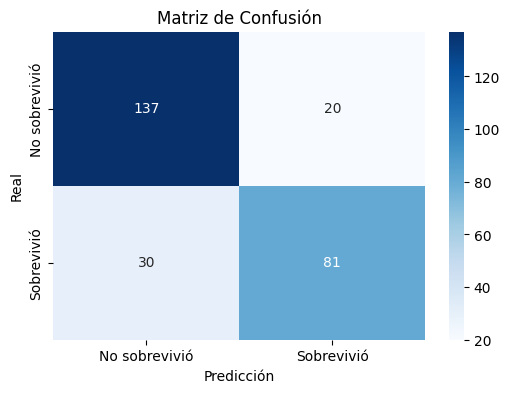

In [31]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el dataset Titanic
titanic = sns.load_dataset('titanic')

# Verificar las columnas del dataset
print(titanic.columns)

# Seleccionamos las columnas relevantes
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Reemplazar valores nulos
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Convertir las variables categóricas (sex y embarked) a variables numéricas
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Definir las características (X) y la variable objetivo (y)
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print("Clasificación Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


#**Support Vector Machines (SVM)**

SVM es un modelo poderoso para clasificación, especialmente cuando los datos no son lineales. Aunque es sensible al escalado y al ajuste de parámetros, sus resultados pueden superar a otros modelos en escenarios complejos.

Las SVM son algoritmos de aprendizaje supervisado usados para clasificación (y regresión). El objetivo principal es encontrar el mejor hiperplano que separe las clases en un espacio de características, maximizando el margen entre los puntos más cercanos de cada clase (vectores de soporte).

 **Conceptos de Margen y Hiperplano**

**Hiperplano:**

Un **hiperplano** es una línea (en 2D) o plano (en 3D) que separa las clases en el espacio de características. La ecuación general de un hiperplano es:

$$
w^T x + b = 0
$$

Donde:
- $ w $ es el vector normal al hiperplano.
- $ x $ es el punto en el espacio de características.
- $ b $ es el sesgo o término independiente.

**Margen:**

El **margen** es la distancia entre el hiperplano y los puntos más cercanos de las clases opuestas (también llamados vectores de soporte). El objetivo de **SVM** es maximizar este margen para garantizar una clasificación robusta.



**Margen Suave y Kernels**

**Margen Suave (Soft Margin):**
En casos de datos **no linealmente separables**, se introduce el **margen suave**, que utiliza el parámetro \( C \) para equilibrar entre maximizar el margen y minimizar los errores de clasificación.

- Si $ C $ es **grande**: Prioriza minimizar los errores (lo que da lugar a un margen más pequeño).
- Si $ C $ es **pequeño**: Permite más errores, pero maximiza el margen.



**Kernels:**
Los **kernels** son funciones que transforman los datos en un espacio de dimensiones más altas para hacerlos separables. Algunos de los tipos de kernels más comunes son:

**Kernel Lineal:**
El kernel lineal es adecuado para datos **linealmente separables** y está dado por:

$$
K(x_i, x_j) = x_i^T x_j
$$

**Kernel Polinómico**:
El kernel polinómico transforma los datos utilizando un polinomio de grado \( d \), y se expresa como:

$$
K(x_i, x_j) = (x_i^T x_j + r)^d
$$

- $ r $ es un término constante.
- $ d $ es el grado del polinomio.

**Kernel RBF (Radial Basis Function):**
El **kernel RBF** es ideal para datos **no lineales** y tiene la siguiente expresión:

$$
K(x_i, x_j) = \exp \left( -\gamma \| x_i - x_j \|^2 \right)
$$

- $ \gamma $ controla la complejidad del modelo.
- Este kernel transforma los datos en un espacio de características no lineal para facilitar la separación.



**Criterio de Optimizació**n

El problema que **SVM** resuelve está formulado como una optimización que minimiza el siguiente objetivo:

$$
\min_{w, b} \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{n} \xi_i
$$

Sujeto a las restricciones:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Donde:
- $ \xi_i $ son las **variables de holgura** que permiten manejar las violaciones del margen.
- $ C $ controla la penalización por los errores en la clasificación.



Con estos conceptos y ecuaciones, SVM busca maximizar el margen entre las clases mientras minimiza los errores de clasificación. El uso de kernels permite transformar el espacio de características para que las clases sean separables incluso en espacios no lineales.


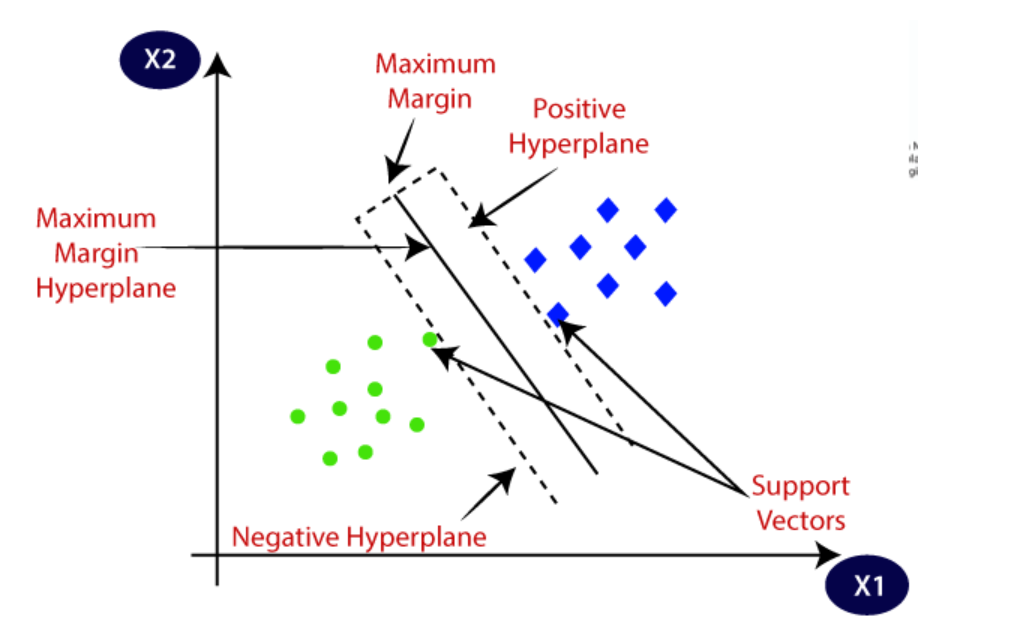

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_72352\3390588064.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=100, marker='x', label='Prueba')


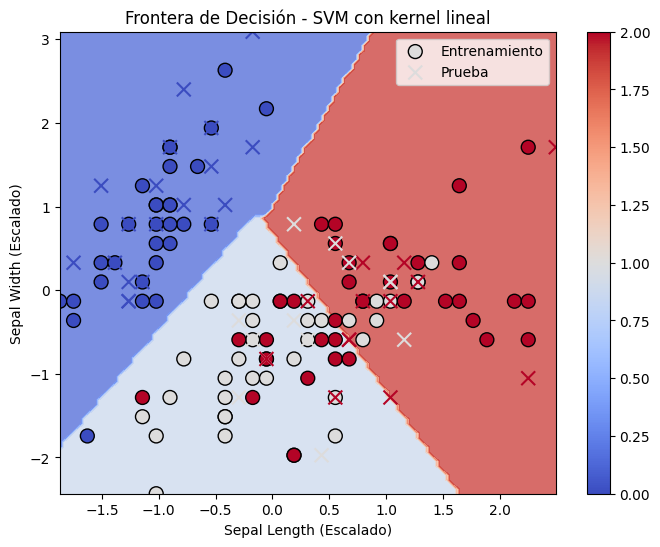

In [32]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Seleccionamos solo las dos primeras características (sepal length y sepal width)
y = iris.target

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo SVM con un kernel lineal
svm = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
svm.fit(X_train, y_train)

# Crear un grid de puntos para la visualización de la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))

# Predecir la clase para cada punto del grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# Graficar los puntos de datos
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=100, marker='o', label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=100, marker='x', label='Prueba')
plt.xlabel('Sepal Length (Escalado)')
plt.ylabel('Sepal Width (Escalado)')
plt.title('Frontera de Decisión - SVM con kernel lineal')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.colorbar()
plt.show()